<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-9/blob/main/255_dimensionality_reduction_databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install umap
!pip install umap-learn[plot]

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=80b59562c6e0e266719b36da1b7c5cfe7c1e9a55a91569f15c133926430c4b56
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=b3a96fddd1bb44d7fd318d29c8b9c287612971fada1c2de90a71c98b860103cf
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


### Generating Dataset

In [6]:
# Generating a synthetic medical dataset on pregnancies
# Features: Age, Number of Pregnancies, Blood Pressure, Blood Glucose Level, Weight, Height
np.random.seed(0)
data_size = 100
data = {
    'Age': np.random.randint(18, 45, size=data_size),
    'Number_of_Pregnancies': np.random.randint(0, 10, size=data_size),
    'Blood_Pressure': np.random.randint(70, 140, size=data_size),
    'Blood_Glucose_Level': np.random.randint(60, 200, size=data_size),
    'Weight': np.random.randint(50, 100, size=data_size),
    'Height': np.random.randint(150, 200, size=data_size)
}
df = pd.DataFrame(data)

Normalizing Dataset


     
Handling Missing Values


     
Exploratory Data Analysis (EDA)



In [9]:
df_normalized = (df - df.mean()) / df.std()

In [10]:
df_normalized.fillna(df_normalized.mean(), inplace=True)

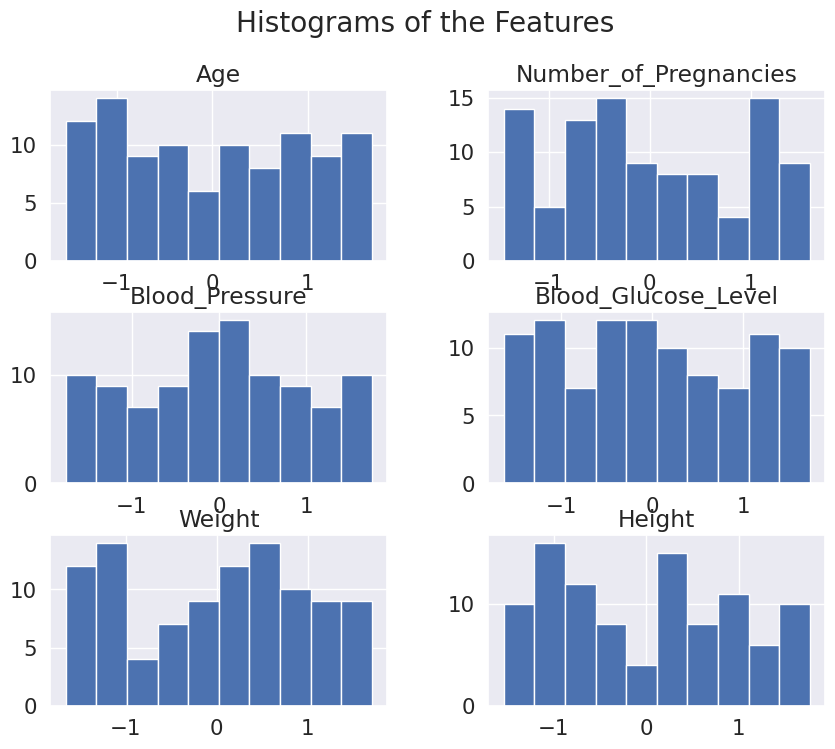

In [11]:
# Histograms
df_normalized.hist(figsize=(10, 8))
plt.suptitle("Histograms of the Features")
plt.show()

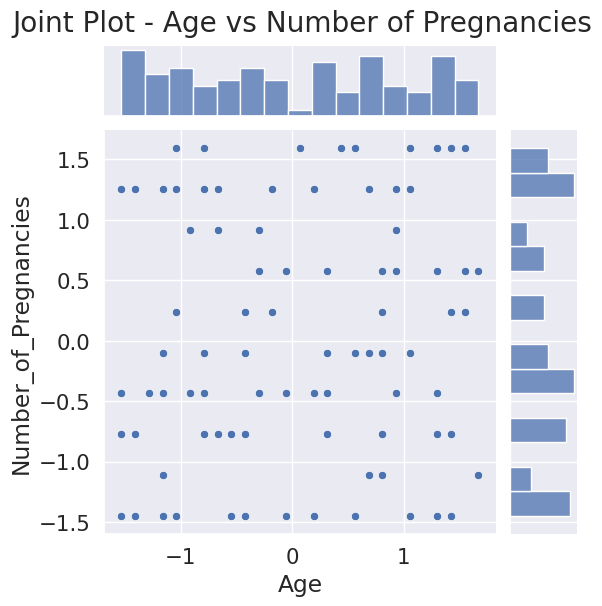

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a joint plot for 'Age' and 'Number_of_Pregnancies'
sns.jointplot(x='Age', y='Number_of_Pregnancies', data=df_normalized, kind="scatter", marginal_kws=dict(bins=15, fill=True))
plt.suptitle("Joint Plot - Age vs Number of Pregnancies", y=1.02)
plt.show()

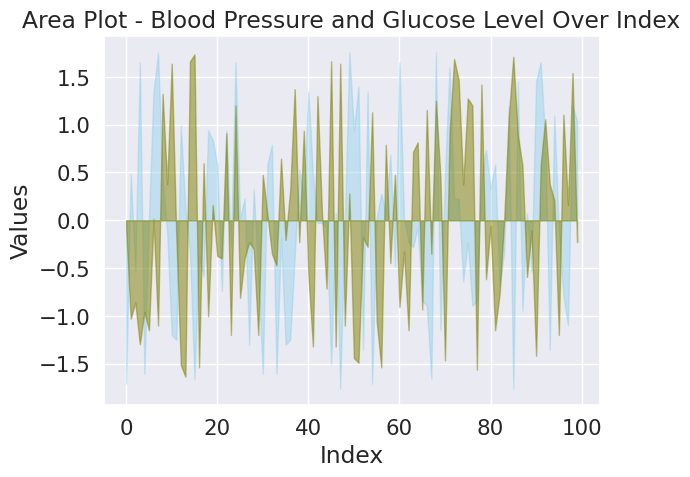

In [20]:
import matplotlib.pyplot as plt

# Creating an area plot for 'Blood_Pressure' and 'Blood_Glucose_Level'
plt.fill_between(df_normalized.index, df_normalized['Blood_Pressure'], color="skyblue", alpha=0.4)
plt.fill_between(df_normalized.index, df_normalized['Blood_Glucose_Level'], color="olive", alpha=0.5)
plt.title("Area Plot - Blood Pressure and Glucose Level Over Index")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

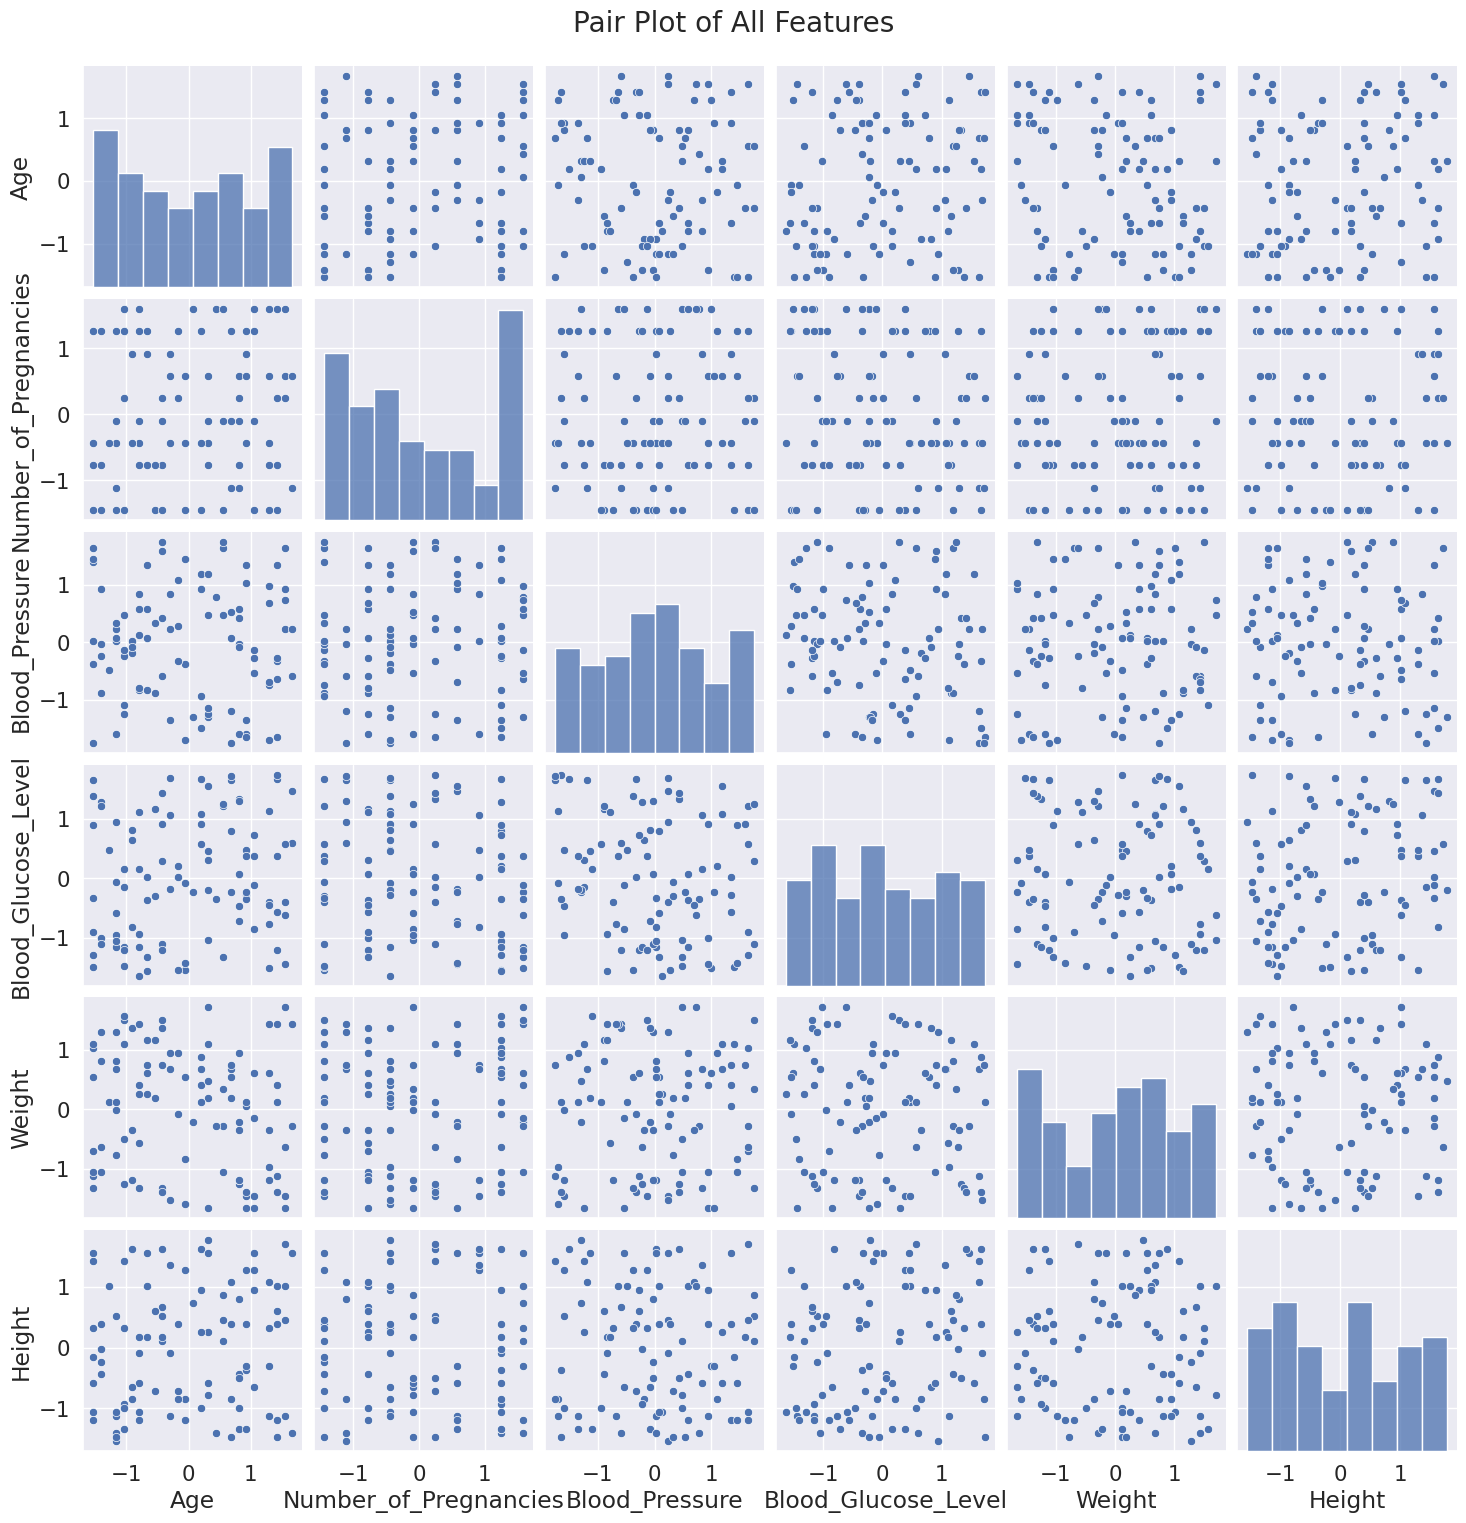

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot to visualize relationships between all pairs of features
sns.pairplot(df_normalized)
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()

### Dimensionality Reduction
### PCA

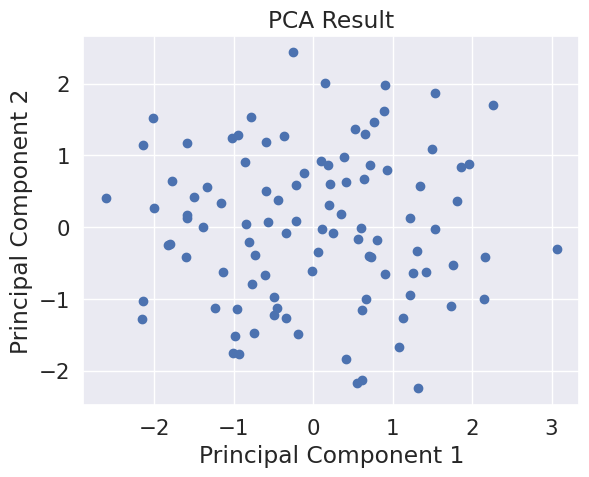

In [23]:
# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalized)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## t-SNE

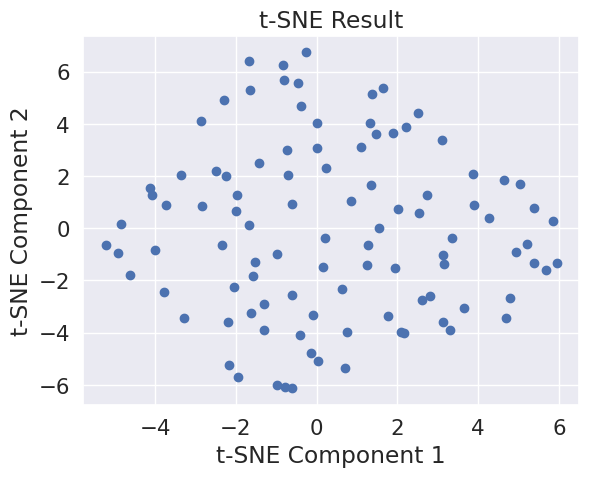

In [16]:
# t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_normalized)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
plt.title("t-SNE Result")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## UMAP

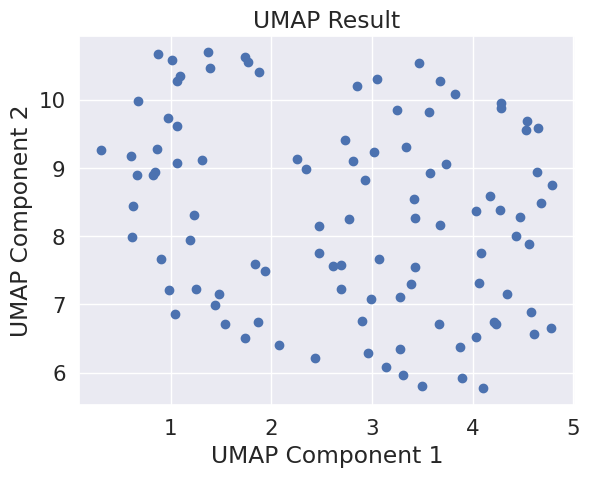

In [17]:
# UMAP
reducer = umap.UMAP()
df_umap = reducer.fit_transform(df_normalized)
plt.scatter(df_umap[:, 0], df_umap[:, 1])
plt.title("UMAP Result")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()